## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


## Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv("covtype.csv")

# Show first 5 rows
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
# Shape of dataset
print("Dataset shape:", data.shape)

Dataset shape: (581012, 55)


## Data Cleaning and Preprocessing

In [5]:
# Check for missing values
print(data.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [6]:
# Separate features and target
X = data.drop("Cover_Type", axis=1)   # features
y = data["Cover_Type"]                # target

## Exploratory Data Analysis (EDA)

## Target distribution

C:\Users\bisho\AppData\Local\Temp\ipykernel_14176\1707821252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


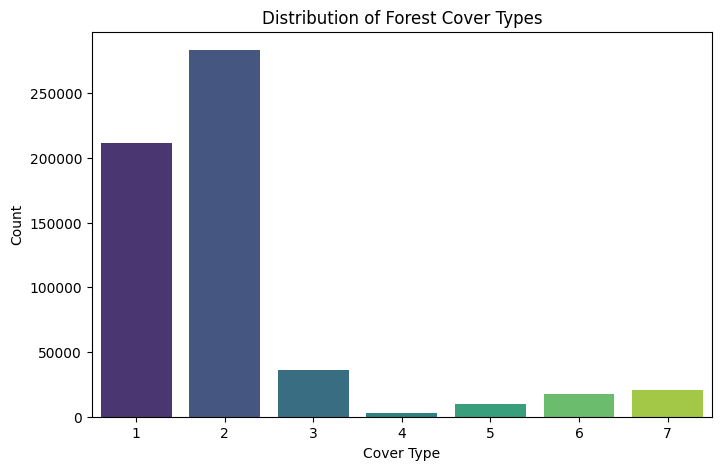

In [7]:
# Distribution of Cover Types
plt.figure(figsize=(8,5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


## Elevation distribution

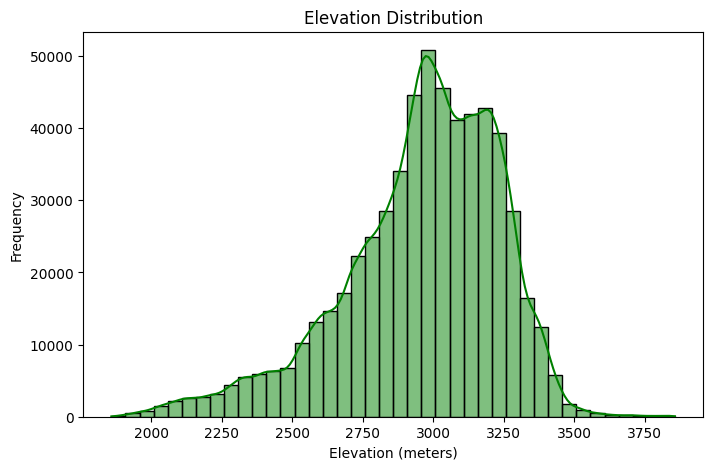

In [8]:
# Elevation distribution
plt.figure(figsize=(8,5))
sns.histplot(X["Elevation"], kde=True, bins=40, color="green")
plt.title("Elevation Distribution")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")
plt.show()

## Elevation vs Cover Type

C:\Users\bisho\AppData\Local\Temp\ipykernel_14176\2267105407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X["Elevation"], palette="Set2")


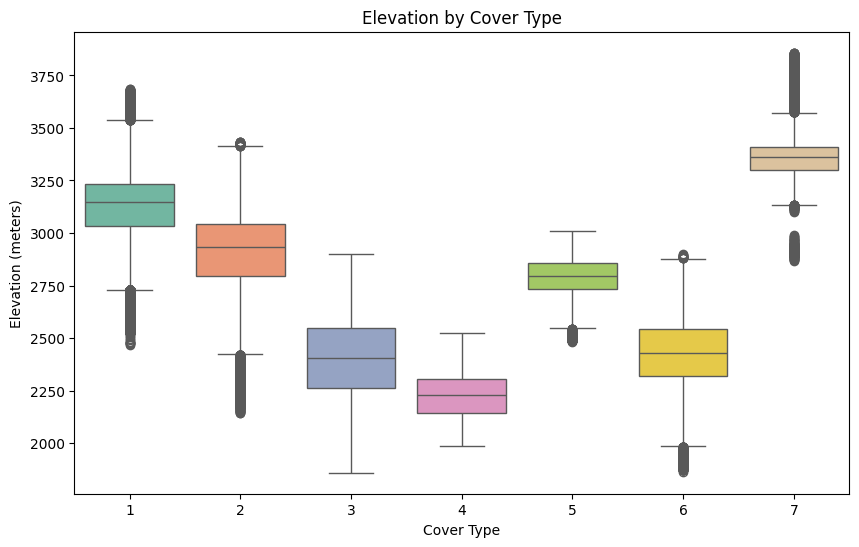

In [9]:
# Boxplot: Elevation by Cover Type
plt.figure(figsize=(10,6))
sns.boxplot(x=y, y=X["Elevation"], palette="Set2")
plt.title("Elevation by Cover Type")
plt.xlabel("Cover Type")
plt.ylabel("Elevation (meters)")
plt.show()

## Soil Type frequencies

C:\Users\bisho\AppData\Local\Temp\ipykernel_14176\3556529523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soil_counts.index, y=soil_counts.values, palette="coolwarm")


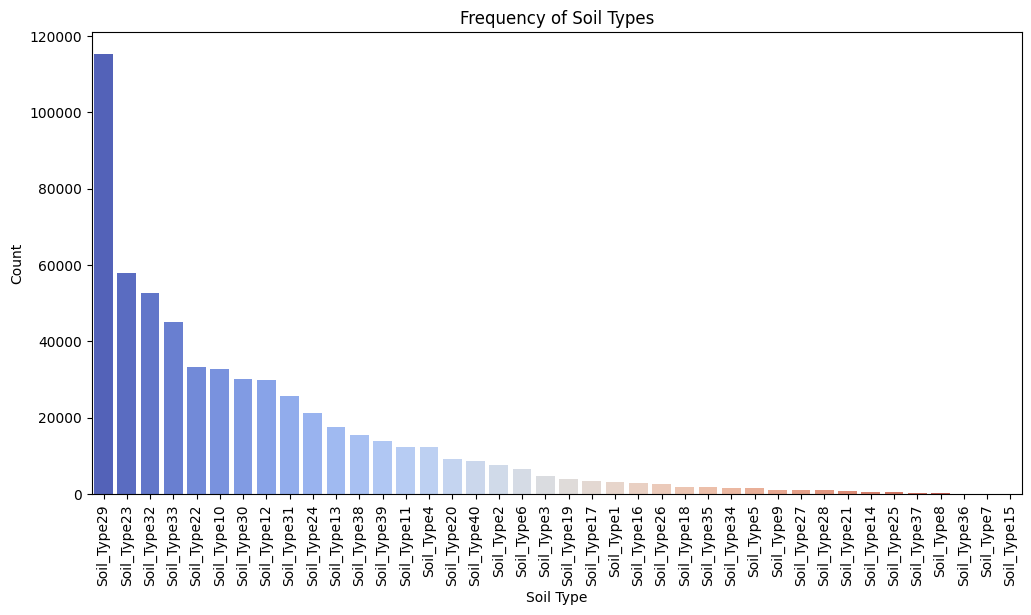

In [10]:
# Sum across all Soil_Type binary columns
soil_cols = [col for col in X.columns if "Soil_Type" in col]
soil_counts = X[soil_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=soil_counts.index, y=soil_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Frequency of Soil Types")
plt.ylabel("Count")
plt.xlabel("Soil Type")
plt.show()

## Correlation heatmap (first 10 numeric features)

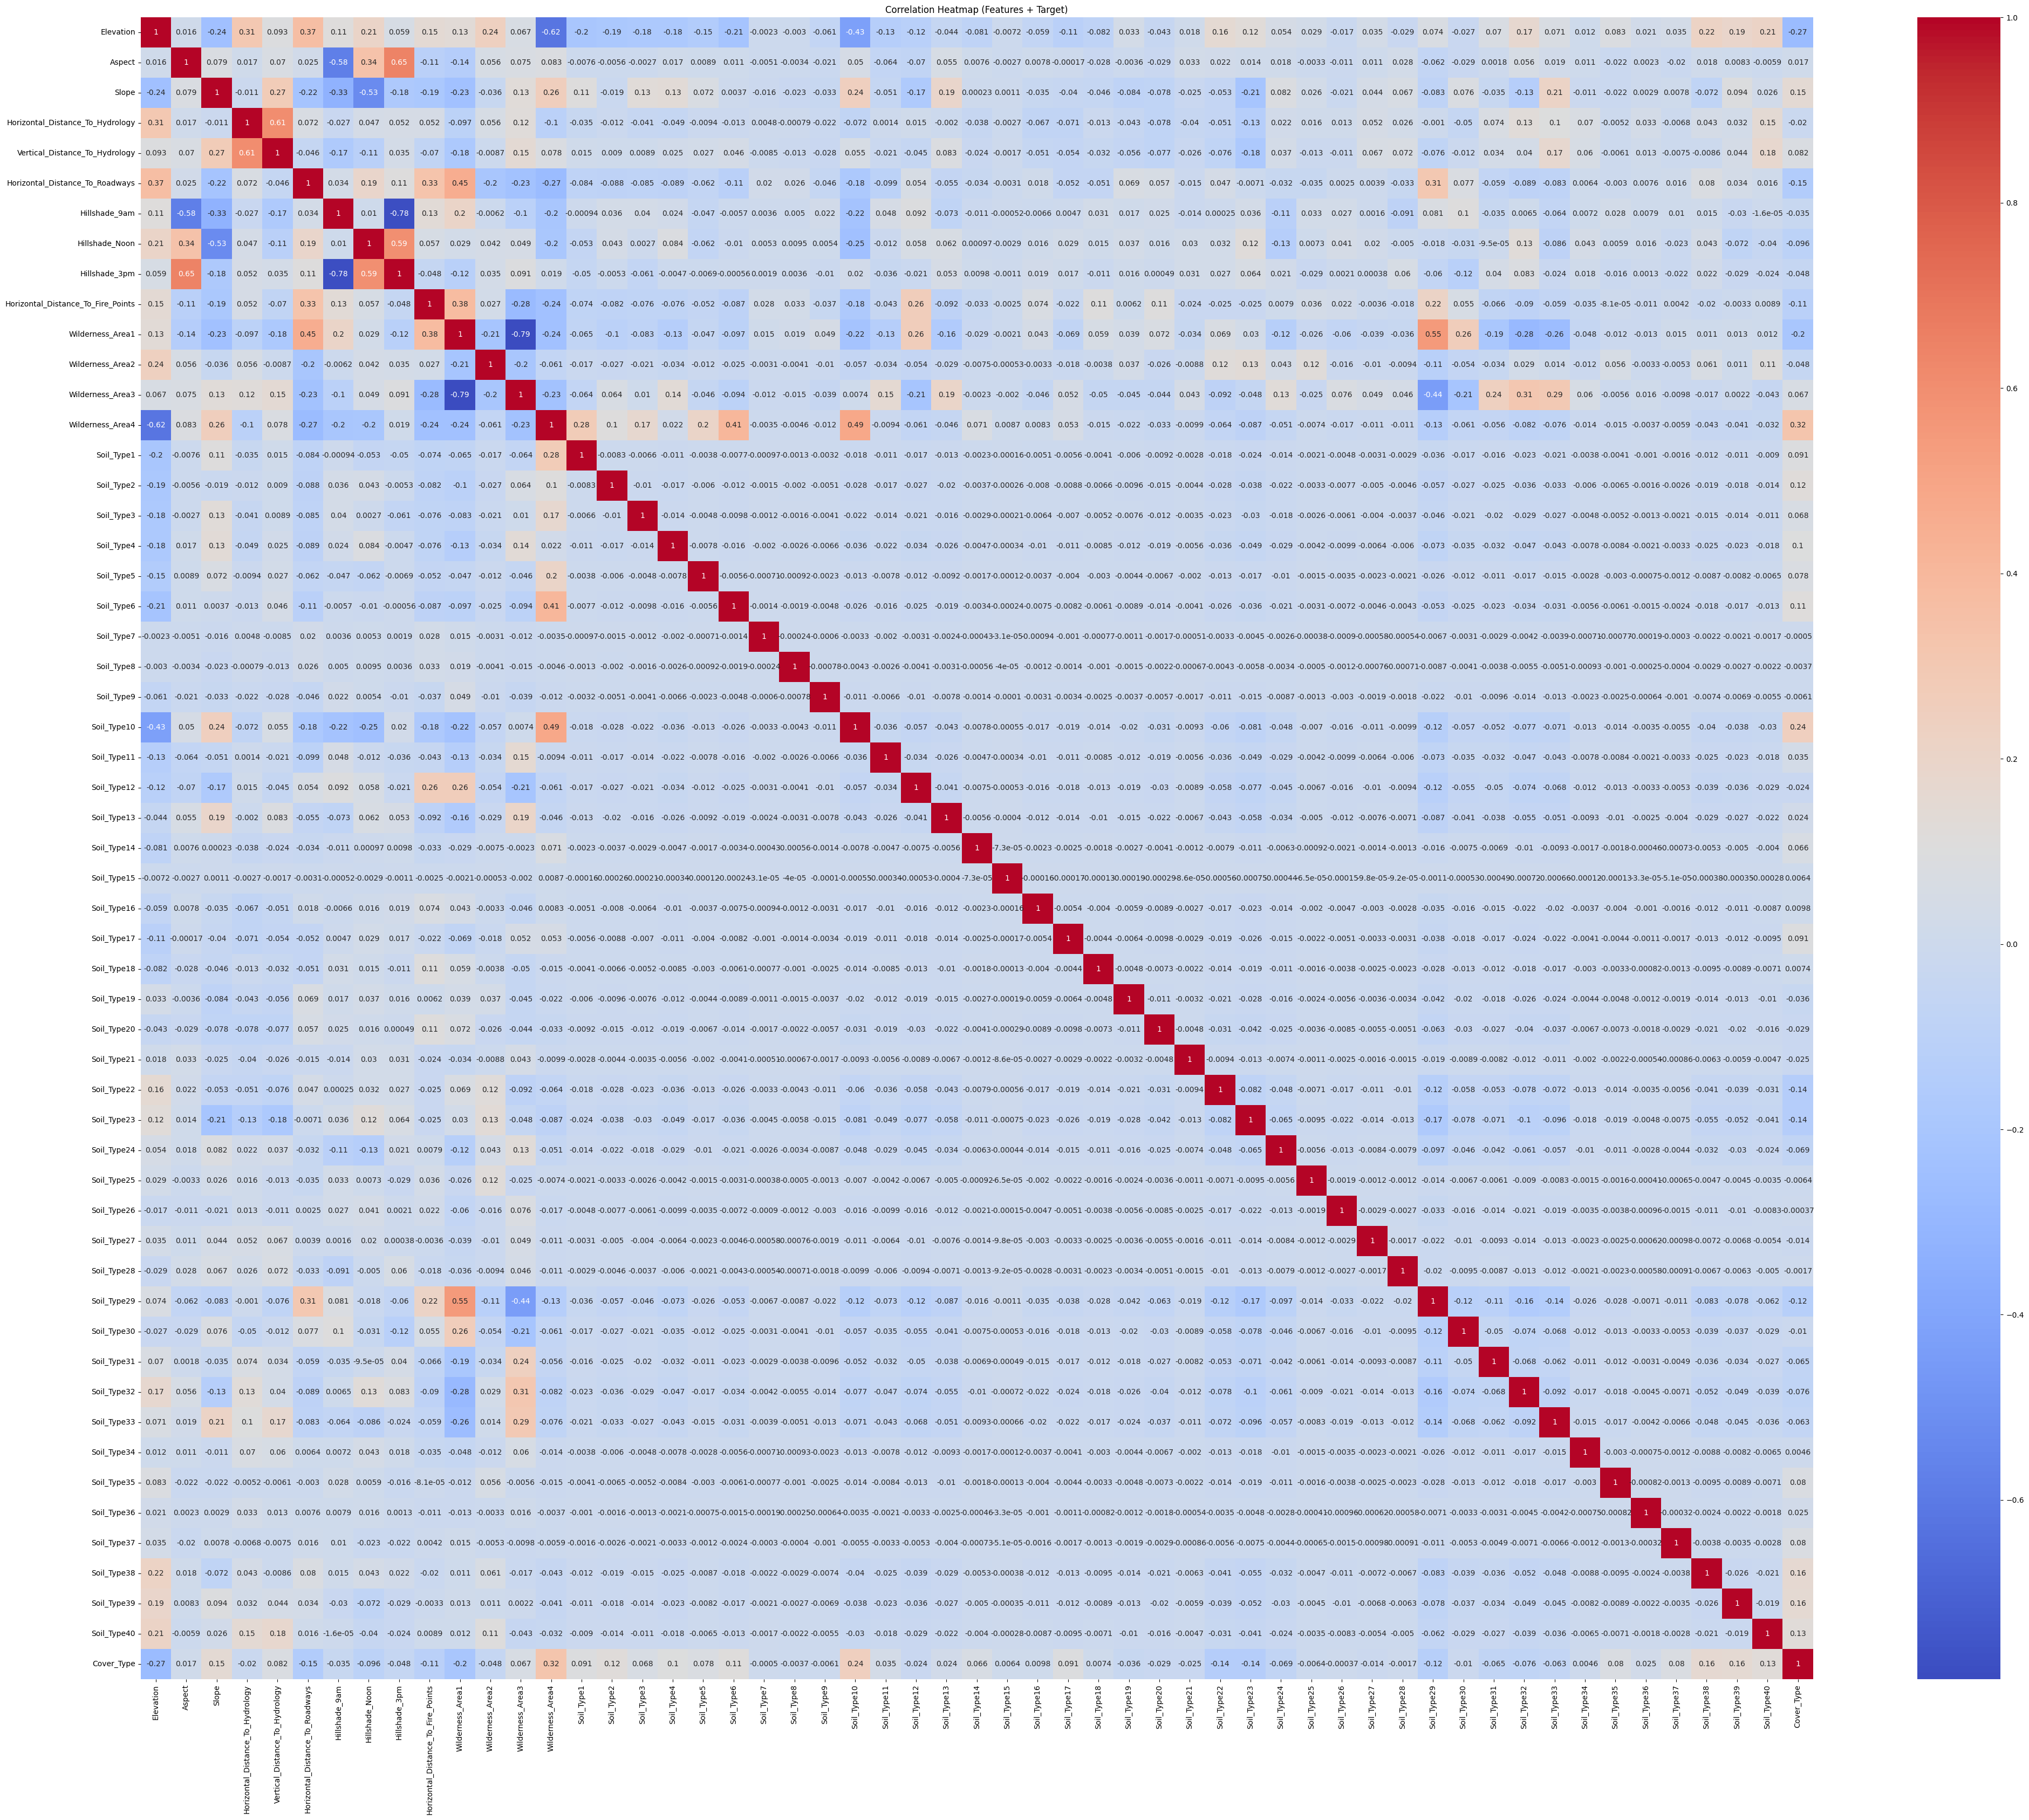

In [11]:
# Add target column to features
df_corr = X.copy()
df_corr["Cover_Type"] = y

# Compute full correlation matrix (features + target)
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=True)
plt.title("Correlation Heatmap (Features + Target)")
plt.show()


## Train a Baseline Decision Tree

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels (1–7 → 0–6)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y_encoded, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Train a baseline Decision Tree with default hyperparameters
dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
# Predictions
y_pred = dt.predict(X_test)

# Accuracy
acc_dt = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {acc_dt*100:.4f}")

Baseline Decision Tree Accuracy: 70.2968


In [16]:
# Detailed performance per class
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     42368
           1       0.73      0.79      0.76     56661
           2       0.63      0.86      0.72      7151
           3       0.59      0.37      0.45       549
           4       0.52      0.06      0.10      1899
           5       0.81      0.04      0.08      3473
           6       0.64      0.55      0.59      4102

    accuracy                           0.70    116203
   macro avg       0.66      0.47      0.48    116203
weighted avg       0.70      0.70      0.69    116203



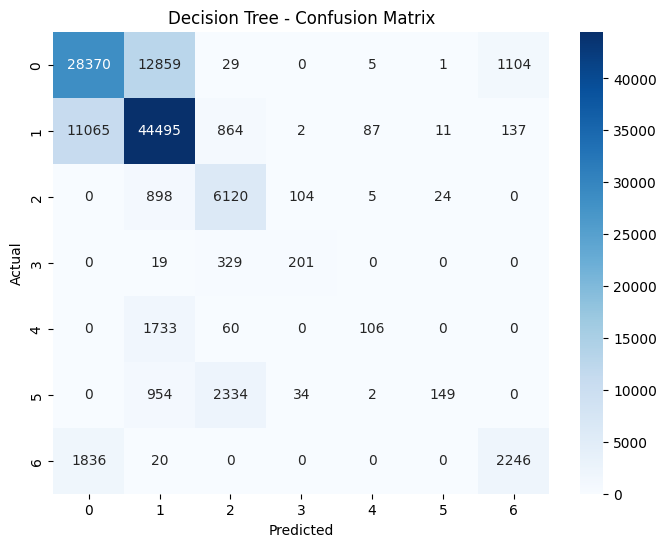

In [17]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Train Models with XGBoost.

In [18]:
from xgboost import XGBClassifier

# Define model
xgb_model = XGBClassifier(
    objective='multi:softmax',   # multiclass classification
    num_class=7,                 # number of classes = 7
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)


C:\Users\bisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:52:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7, ...)

In [27]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc_xgb*100:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 70.2968

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     42368
           1       0.73      0.79      0.76     56661
           2       0.63      0.86      0.72      7151
           3       0.59      0.37      0.45       549
           4       0.52      0.06      0.10      1899
           5       0.81      0.04      0.08      3473
           6       0.64      0.55      0.59      4102

    accuracy                           0.70    116203
   macro avg       0.66      0.47      0.48    116203
weighted avg       0.70      0.70      0.69    116203



In [20]:
print("Decision Tree Accuracy:", acc_dt)
print("XGBoost Accuracy:", acc_xgb)

Decision Tree Accuracy: 0.7029680817190606
XGBoost Accuracy: 0.7029680817190606


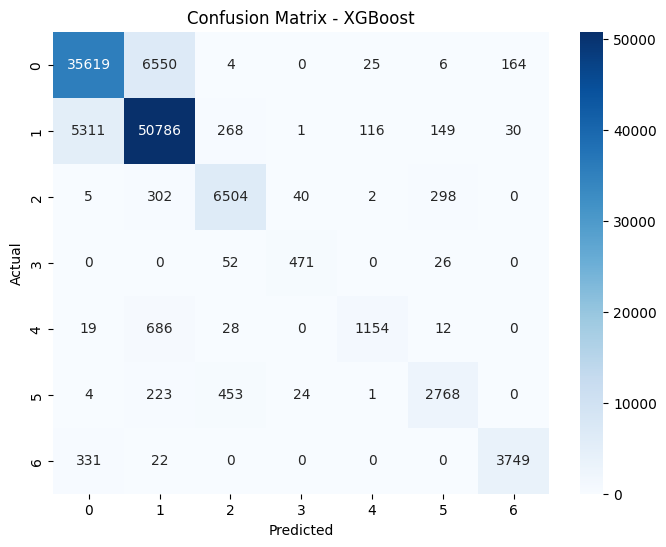

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## Feature Importance

In [23]:
# Step 8.1: Extract feature importances from XGBoost
xgb_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

xgb_importances.head(15)   # show top 15 features


,Feature,Importance
0,Elevation,0.092647
10,Wilderness_Area1,0.058123
35,Soil_Type22,0.050163
45,Soil_Type32,0.047508
15,Soil_Type2,0.047059
25,Soil_Type12,0.045248
17,Soil_Type4,0.042663
52,Soil_Type39,0.035628
51,Soil_Type38,0.035418
12,Wilderness_Area3,0.033549


C:\Users\bisho\AppData\Local\Temp\ipykernel_14176\481122537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


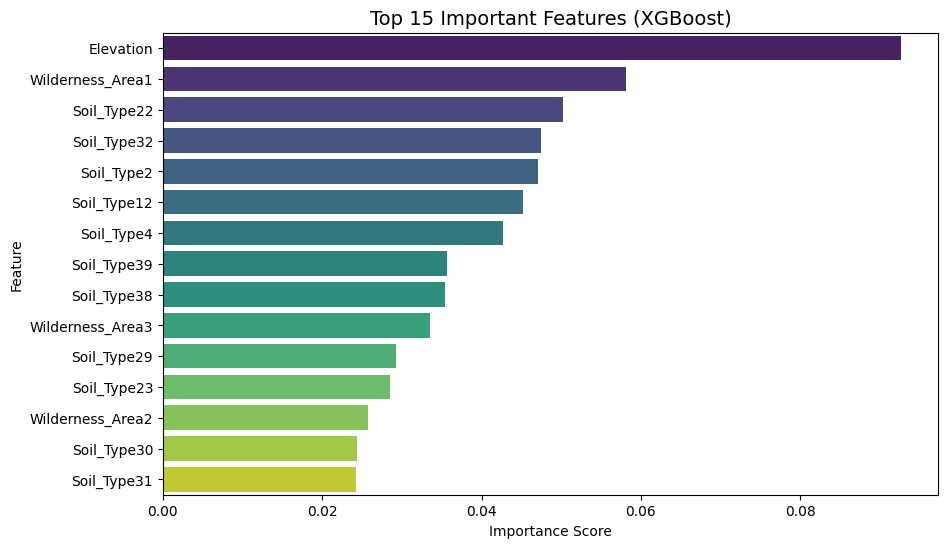

In [24]:
# Step 8.2: Visualize feature importances
plt.figure(figsize=(10,6))
sns.barplot(
    data=xgb_importances.head(15),
    x="Importance", y="Feature", palette="viridis"
)
plt.title("Top 15 Important Features (XGBoost)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## Bonus

## Train Random Forest for Comparison

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Accuracy
rf_acc = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Random Forest Accuracy: 0.9542


In [26]:
# Evaluate XGBoost model again
xgb_acc = xgb_model.score(X_test, y_test)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.8696


In [28]:
print("📊 Model Comparison:")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

📊 Model Comparison:
Random Forest Accuracy: 0.9542
XGBoost Accuracy: 0.8696
